In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# importing libraries
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import GlobalAveragePooling2D, Dense, Dropout
from keras.applications import DenseNet201
from matplotlib import pyplot as plt
import time
import tensorflow as tf
import keras

start = time.time()
img_width, img_height = 71,71

train_data_dir = '/content/drive/MyDrive/8.HAM10000/base_dir/train'
validation_data_dir = '/content/drive/MyDrive/8.HAM10000/base_dir/test'
nb_train_samples = 15435
nb_validation_samples = 4325
epochs = 25
batch_size = 64

input_shape = (img_width, img_height, 3)

# Create a DenseNet201 model pre-trained on ImageNet
base_model = DenseNet201(weights='imagenet', include_top=False, input_shape=input_shape)

# Freeze the layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(7, activation='softmax'))
model.summary()

opt = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

# Use DenseNet201 specific preprocessing function
train_datagen = ImageDataGenerator(preprocessing_function=keras.applications.densenet.preprocess_input,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

Val_datagen = ImageDataGenerator(preprocessing_function=keras.applications.densenet.preprocess_input)

train_generator = train_datagen.flow_from_directory(train_data_dir,
                                                    target_size=(img_width, img_height),
                                                    batch_size=batch_size, class_mode='categorical')

validation_generator = Val_datagen.flow_from_directory(validation_data_dir,
                                                        target_size=(img_width, img_height),
                                                        batch_size=batch_size, class_mode='categorical', shuffle=False)

history = model.fit_generator(train_generator,
                              steps_per_epoch=nb_train_samples // batch_size,
                              epochs=epochs, validation_data=validation_generator,
                              validation_steps=nb_validation_samples // batch_size)

model.save_weights('model_saved.h5')

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('accuracy')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('loss')
plt.show()

end = time.time()
print(end - start)


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
#Confution Matrix and Classification Report
Y_pred = model.predict_generator(validation_generator)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))
print('Classification Report')
target_names = ['akiec','bcc','bkl','df','mel','nv','vasc']
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

<ipython-input-4-62151c4e2a32>:4: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred = model.predict_generator(validation_generator)


Confusion Matrix
[[312  66  89  18  39  11   0]
 [ 64 378  71  19  27  33   6]
 [ 48  38 384   6  71  81   2]
 [ 17  29  25 342  10  20   1]
 [ 26  20 124  12 313 112   5]
 [  1   6  30   2  35 895   2]
 [  1  12   3   0   3  13 503]]
Classification Report
              precision    recall  f1-score   support

       akiec       0.67      0.58      0.62       535
         bcc       0.69      0.63      0.66       598
         bkl       0.53      0.61      0.57       630
          df       0.86      0.77      0.81       444
         mel       0.63      0.51      0.56       612
          nv       0.77      0.92      0.84       971
        vasc       0.97      0.94      0.95       535

    accuracy                           0.72      4325
   macro avg       0.73      0.71      0.72      4325
weighted avg       0.72      0.72      0.72      4325



**xception**

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 3, 3, 2048)        20861480  
                                                                 
 flatten_1 (Flatten)         (None, 18432)             0         
                                                                 
 dense_2 (Dense)             (None, 64)                1179712   
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 7)                 455       
                                                                 
Total params: 22041647 (84.08 MB)
Trainable params: 21987119 (83.87 MB)
Non-trainable params: 54528 (213.00 KB)
_________________________________________________________________
Found 15

<ipython-input-2-d75aebc04294>:55: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator,


Epoch 1/25
241/241 [==============================] - 4612s 19s/step - loss: 1.1232 - accuracy: 0.5760 - val_loss: 0.7322 - val_accuracy: 0.7325
Epoch 2/25
241/241 [==============================] - 159s 658ms/step - loss: 0.6298 - accuracy: 0.7648 - val_loss: 0.5289 - val_accuracy: 0.8022
Epoch 3/25
241/241 [==============================] - 140s 580ms/step - loss: 0.4564 - accuracy: 0.8315 - val_loss: 0.4579 - val_accuracy: 0.8344
Epoch 4/25
241/241 [==============================] - 157s 651ms/step - loss: 0.3563 - accuracy: 0.8714 - val_loss: 0.4301 - val_accuracy: 0.8491
Epoch 5/25
241/241 [==============================] - 141s 585ms/step - loss: 0.2716 - accuracy: 0.9040 - val_loss: 0.4172 - val_accuracy: 0.8640
Epoch 6/25
241/241 [==============================] - 140s 581ms/step - loss: 0.2272 - accuracy: 0.9203 - val_loss: 0.4068 - val_accuracy: 0.8668
Epoch 7/25
241/241 [==============================] - 139s 577ms/step - loss: 0.1854 - accuracy: 0.9342 - val_loss: 0.3713 - 

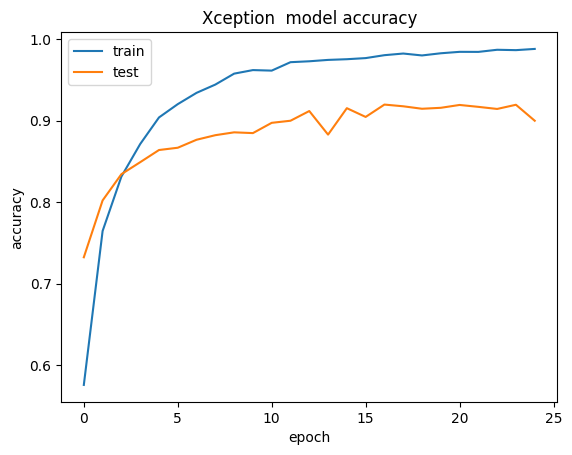

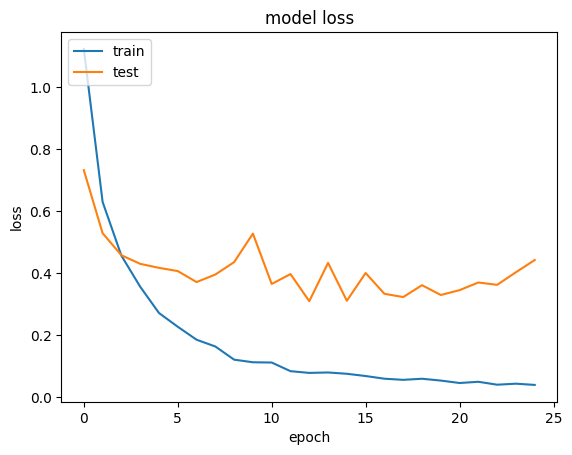

8474.01108956337


In [ ]:
# importing libraries
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.applications import Xception
from keras import backend as K
from matplotlib import pyplot as plt
import time
import tensorflow as tf
import keras

start = time.time()
img_width, img_height = 71,71

train_data_dir = '/content/drive/MyDrive/8.HAM10000/base_dir/train'
validation_data_dir = '/content/drive/MyDrive/8.HAM10000/base_dir/test'
nb_train_samples = 15435
nb_validation_samples = 4325
epochs =25
batch_size =64


input_shape = (img_width, img_height, 3)

# Use Xception as the base model
base_model = Xception(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(7, activation='softmax'))
model.summary()

opt = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss ='categorical_crossentropy',optimizer=opt, metrics =['accuracy'])

train_datagen = ImageDataGenerator(rescale=1. / 255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

Val_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(train_data_dir,
                                                    target_size=(img_width, img_height),
                                                    batch_size=batch_size, class_mode='categorical')

validation_generator = Val_datagen.flow_from_directory(validation_data_dir,
                                                        target_size=(img_width, img_height),
                                                        batch_size=batch_size, class_mode='categorical', shuffle=False)

history = model.fit_generator(train_generator,
                              steps_per_epoch=nb_train_samples // batch_size,
                              epochs=epochs, validation_data=validation_generator,
                              validation_steps=nb_validation_samples // batch_size)

model.save_weights('model_xcpetion.h5')

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Xception  model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('accuracy')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('loss')
plt.show()
end = time.time()
print(end - start)


classification report

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
#Confution Matrix and Classification Report
Y_pred = model.predict_generator(validation_generator)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))
print('Classification Report')
target_names = ['akiec','bcc','bkl','df','mel','nv','vasc']
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

<ipython-input-3-62151c4e2a32>:4: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred = model.predict_generator(validation_generator)


Confusion Matrix
[[459  16  13   1  35  11   0]
 [  3 571   4   0   9  11   0]
 [ 12  15 442   0  89  72   0]
 [  2   5   3 423   4   7   0]
 [  2   3  11   1 539  56   0]
 [  0   8  11   1  20 930   1]
 [  0   0   0   0   0   3 532]]
Classification Report
              precision    recall  f1-score   support

       akiec       0.96      0.86      0.91       535
         bcc       0.92      0.95      0.94       598
         bkl       0.91      0.70      0.79       630
          df       0.99      0.95      0.97       444
         mel       0.77      0.88      0.82       612
          nv       0.85      0.96      0.90       971
        vasc       1.00      0.99      1.00       535

    accuracy                           0.90      4325
   macro avg       0.92      0.90      0.90      4325
weighted avg       0.91      0.90      0.90      4325



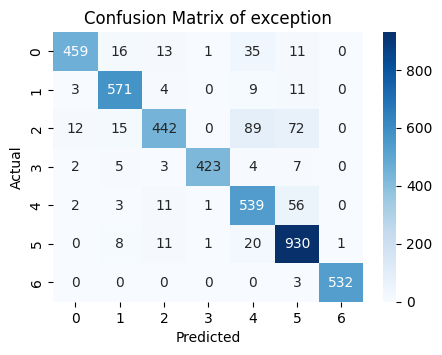

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

cm_matrix = confusion_matrix(validation_generator.classes, y_pred)
# Read the confusion matrix from Excel into a DataFrame
# Create a heatmap using seaborn
plt.figure(figsize=(5, 3.5))
sns.heatmap(cm_matrix, annot=True, cmap='Blues', fmt='d')

# Set the title and labels
plt.title('Confusion Matrix of exception')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Save the plot as an image
plt.savefig('confusion_matrix_exception.png')

# Show the plot
plt.show()

vgg16

In [ ]:
# importing libraries
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import VGG16
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.optimizers import Adam
import matplotlib.pyplot as plt
import time

start = time.time()
img_width, img_height = 71,71

train_data_dir = '/content/drive/MyDrive/8.HAM10000/base_dir/train'
validation_data_dir = '/content/drive/MyDrive/8.HAM10000/base_dir/test'
nb_train_samples = 15435
nb_validation_samples = 4325
epochs =25
batch_size =64


# Use VGG16 as base model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(7, activation='softmax'))

model.summary()

opt = Adam(learning_rate=0.0001)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

# Data augmentation
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

history = model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size
)

model.save_weights('model_saved.h5')

# Summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.savefig('accuracy.png')
plt.show()

# Summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.savefig('loss.png')
plt.show()

end = time.time()
print("Time taken: ", end - start)


58889256/58889256 [==============================] - 3s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 2, 2, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 64)                131136    
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 7)                 455       
                                                                 
Total params: 14846279 (56.63 MB)
Trainable params: 14846279 (56.63 MB)
Non-trainable params: 0 (0.00 Byte)
_______________

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/8.HAM10000/base_dir/train'

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
#Confution Matrix and Classification Report
Y_pred = model.predict_generator(validation_generator)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))
print('Classification Report')
target_names = ['akiec','bcc','bkl','df','mel','nv','vasc']
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

<ipython-input-2-62151c4e2a32>:4: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred = model.predict_generator(validation_generator)


Confusion Matrix
[[442  12  23   1  50   7   0]
 [  4 559  25   5   2   2   1]
 [ 17   9 524   1  53  26   0]
 [  2   0   0 439   0   3   0]
 [  3  13  48   1 473  72   2]
 [  1   9  56   0  28 875   2]
 [  0   0   1   0   0   0 534]]
Classification Report
              precision    recall  f1-score   support

       akiec       0.94      0.83      0.88       535
         bcc       0.93      0.93      0.93       598
         bkl       0.77      0.83      0.80       630
          df       0.98      0.99      0.99       444
         mel       0.78      0.77      0.78       612
          nv       0.89      0.90      0.89       971
        vasc       0.99      1.00      0.99       535

    accuracy                           0.89      4325
   macro avg       0.90      0.89      0.90      4325
weighted avg       0.89      0.89      0.89      4325



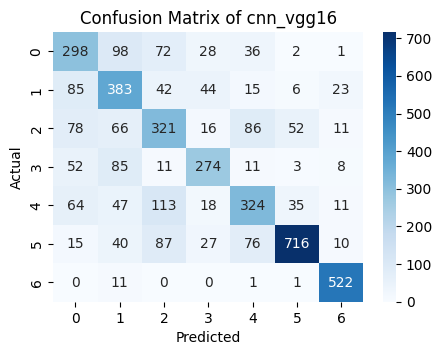

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

cm_matrix = confusion_matrix(validation_generator.classes, y_pred)
# Read the confusion matrix from Excel into a DataFrame
# Create a heatmap using seaborn
plt.figure(figsize=(5, 3.5))
sns.heatmap(cm_matrix, annot=True, cmap='Blues', fmt='d')

# Set the title and labels
plt.title('Confusion Matrix of cnn_vgg16')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Save the plot as an image
plt.savefig('confusion_matrix_vgg16.png')

# Show the plot
plt.show()

CNN

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 69, 69, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 34, 34, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 16, 16, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 7, 7, 128)         0

<ipython-input-2-4c8a50f3a955>:67: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/25
241/241 [==============================] - 8667s 36s/step - loss: 1.8525 - accuracy: 0.2497 - val_loss: 1.7293 - val_accuracy: 0.3323
Epoch 2/25
241/241 [==============================] - 142s 588ms/step - loss: 1.5667 - accuracy: 0.3811 - val_loss: 1.4292 - val_accuracy: 0.4517
Epoch 3/25
241/241 [==============================] - 141s 586ms/step - loss: 1.4216 - accuracy: 0.4367 - val_loss: 1.3534 - val_accuracy: 0.4748
Epoch 4/25
241/241 [==============================] - 152s 631ms/step - loss: 1.3459 - accuracy: 0.4743 - val_loss: 1.2802 - val_accuracy: 0.5112
Epoch 5/25
241/241 [==============================] - 144s 597ms/step - loss: 1.3007 - accuracy: 0.4909 - val_loss: 1.2511 - val_accuracy: 0.5187
Epoch 6/25
241/241 [==============================] - 143s 594ms/step - loss: 1.2559 - accuracy: 0.5138 - val_loss: 1.2164 - val_accuracy: 0.5375
Epoch 7/25
241/241 [==============================] - 142s 592ms/step - loss: 1.2200 - accuracy: 0.5250 - val_loss: 1.1789 - 

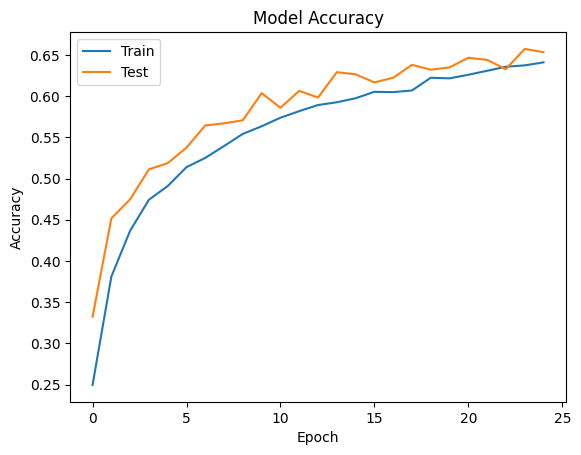

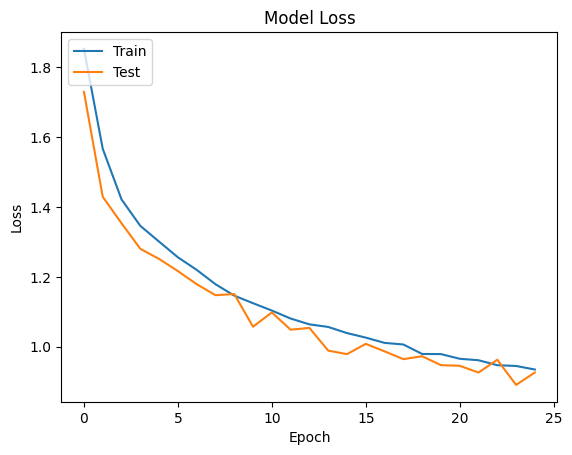

Time taken:  12108.350799560547


In [ ]:
# importing libraries
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import time

start = time.time()
img_width, img_height = 71, 71

train_data_dir = '/content/drive/MyDrive/8.HAM10000/base_dir/train'
validation_data_dir = '/content/drive/MyDrive/8.HAM10000/base_dir/test'
nb_train_samples = 15435
nb_validation_samples = 4325
epochs = 25
batch_size = 64

model = Sequential()

# Add convolutional layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())

# Add dense layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(7, activation='softmax'))

model.summary()

opt = Adam(learning_rate=0.0001)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

# Data augmentation
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

history = model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size
)

model.save_weights('model_saved.h5')

# Summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.savefig('accuracy.png')
plt.show()

# Summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.savefig('loss.png')
plt.show()

end = time.time()
print("Time taken: ", end - start)


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
#Confution Matrix and Classification Report
Y_pred = model.predict_generator(validation_generator)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))
print('Classification Report')
target_names = ['akiec','bcc','bkl','df','mel','nv','vasc']
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

<ipython-input-3-62151c4e2a32>:4: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred = model.predict_generator(validation_generator)


Confusion Matrix
[[298  98  72  28  36   2   1]
 [ 85 383  42  44  15   6  23]
 [ 78  66 321  16  86  52  11]
 [ 52  85  11 274  11   3   8]
 [ 64  47 113  18 324  35  11]
 [ 15  40  87  27  76 716  10]
 [  0  11   0   0   1   1 522]]
Classification Report
              precision    recall  f1-score   support

       akiec       0.50      0.56      0.53       535
         bcc       0.52      0.64      0.58       598
         bkl       0.50      0.51      0.50       630
          df       0.67      0.62      0.64       444
         mel       0.59      0.53      0.56       612
          nv       0.88      0.74      0.80       971
        vasc       0.89      0.98      0.93       535

    accuracy                           0.66      4325
   macro avg       0.65      0.65      0.65      4325
weighted avg       0.67      0.66      0.66      4325



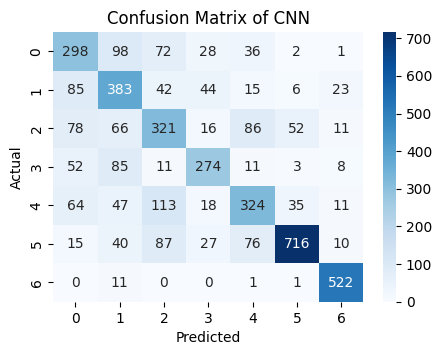

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

cm_matrix = confusion_matrix(validation_generator.classes, y_pred)
# Read the confusion matrix from Excel into a DataFrame
# Create a heatmap using seaborn
plt.figure(figsize=(5, 3.5))
sns.heatmap(cm_matrix, annot=True, cmap='Blues', fmt='d')

# Set the title and labels
plt.title('Confusion Matrix of CNN')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Save the plot as an image
plt.savefig('confusion_matrix_CNN.png')

# Show the plot
plt.show()